In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os
import pingouin
import datapungibea as dpb
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
from pgmpy.estimators import PC
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.discrete.discrete_model import Logit
from networkx.drawing.nx_agraph import graphviz_layout
from collections import defaultdict
import math
import statsmodels.formula.api as smf
%matplotlib inline
from statsmodels.tsa.api import VAR
from linearmodels.panel import PanelOLS

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from abbeyFunctions import graph_DAG, create_cluster_dags, determine_p_value, graph_DAG_cluster, get_edges_dict, get_col_shared_edges, get_row_shared_edges, plot_shared_edges, plot_shared_col_edges, plot_shared_row_edges, hausman_test

In [3]:
ai_data_nominal = pd.read_csv('nominal_data.csv')

In [4]:
ai_data_nominal = ai_data_nominal.set_index(['FIPS_y', 'TimePeriod'])

In [5]:
exclude_vars = ['M4 I','RM4I', 'unem']  # List of variables to exclude

# Create a dictionary to store the dataframes
ai_dct = {"logged_n": ai_data_nominal.copy(),
          "rates_n": ai_data_nominal.copy(),
         "percent rates_n": ai_data_nominal.copy()}

        
for col in ai_dct['logged_n'].columns:
    if col not in exclude_vars:
        ai_dct["logged_n"][col] = np.log(ai_data_nominal[col]).replace([np.inf, -np.inf], np.nan)


# Calculate rate of change (differences of log-transformed values)
for col in ai_dct['rates_n'].columns:
    if col not in exclude_vars:
        ai_dct["rates_n"][col] = ai_dct["logged_n"].groupby('FIPS_y')[col].diff().dropna()
                
        
        # Calculate percent rate of change
for col in ai_dct['percent rates_n'].columns:
    #if col not in exclude_vars:
        ai_dct["percent rates_n"][col] = ai_dct["rates_n"].groupby('FIPS_y')[col].diff().dropna()


/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
diff_nominal = ai_dct['percent rates_n']

In [7]:
diff_nominal.drop(columns=['All ', 'Neig'], inplace=True)

In [8]:
diff_nominal = diff_nominal.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [9]:
ai_df_diffnom = pd.read_csv('diff_nominal_kml3d.csv')

In [10]:
level_12 = ai_df_diffnom

In [11]:
dfg_ai12 = diff_nominal.dropna()

In [12]:
ai_merge12 = pd.merge(dfg_ai12, level_12[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [13]:
kml3d_ai_level12 = ai_merge12.dropna()

In [14]:
kml3d_ai_level12 = kml3d_ai_level12.set_index(['FIPS_y'])

In [15]:
cluster_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [16]:
kml3d_ai_level12['clusters'].replace(cluster_mapping, inplace=True)

In [17]:
ndr_13 = kml3d_ai_level12

In [18]:
ndr_13.columns

Index(['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem', 'clusters'], dtype='object')

In [19]:
ndr_13 = ndr_13.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [20]:
ndr_14 = ndr_13.copy()

In [21]:
ndr_14.drop(columns=['M4', 'M4I'], inplace=True)

In [22]:
ndr_16 = ndr_13.copy()

In [23]:
ndr_16.drop(columns=['unem'], inplace=True)

In [24]:
plot_df5 = diff_nominal.copy()
plot_df6 = diff_nominal.copy()

In [25]:
plot_df4 = diff_nominal.dropna()
plot_df5.drop(columns=['M4', 'M4I'], inplace=True)
plot_df6.drop(columns=['unem'], inplace=True)

In [26]:
plot_df4 = plot_df4.dropna()
plot_df5 = plot_df5.dropna()
plot_df6 = plot_df6.dropna()

  0%|          | 0/4 [00:00<?, ?it/s]

keep control: unem
('Mini', 'M4I') ['unem']
keep control: Agri
('Util', 'M4') ['Agri']
('M4', 'unem') []
keep control: Mini
('unem', 'M4I') ['Mini']
('unem', 'Mini') []
keep control: Util
('Agri', 'M4') ['Util']


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Mini
keep control: Util
('Agri', 'unem') ['Mini', 'Util']
keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']
keep control: Mini
keep control: Agri
('Util', 'unem') ['Mini', 'Agri']


  0%|          | 0/3 [00:00<?, ?it/s]

keep control: Mini
keep control: M4I
keep control: Agri
('Util', 'M4') ['Mini', 'M4I', 'Agri']
keep control: Util
keep control: M4I
keep control: Agri
('Mini', 'M4') ['Util', 'M4I', 'Agri']
('Mini', 'M4I') []
keep control: Mini
keep control: Util
keep control: Agri
('M4I', 'M4') ['Mini', 'Util', 'Agri']
('M4I', 'Mini') []
keep control: Mini
keep control: Util
keep control: M4I
('Agri', 'M4') ['Mini', 'Util', 'M4I']


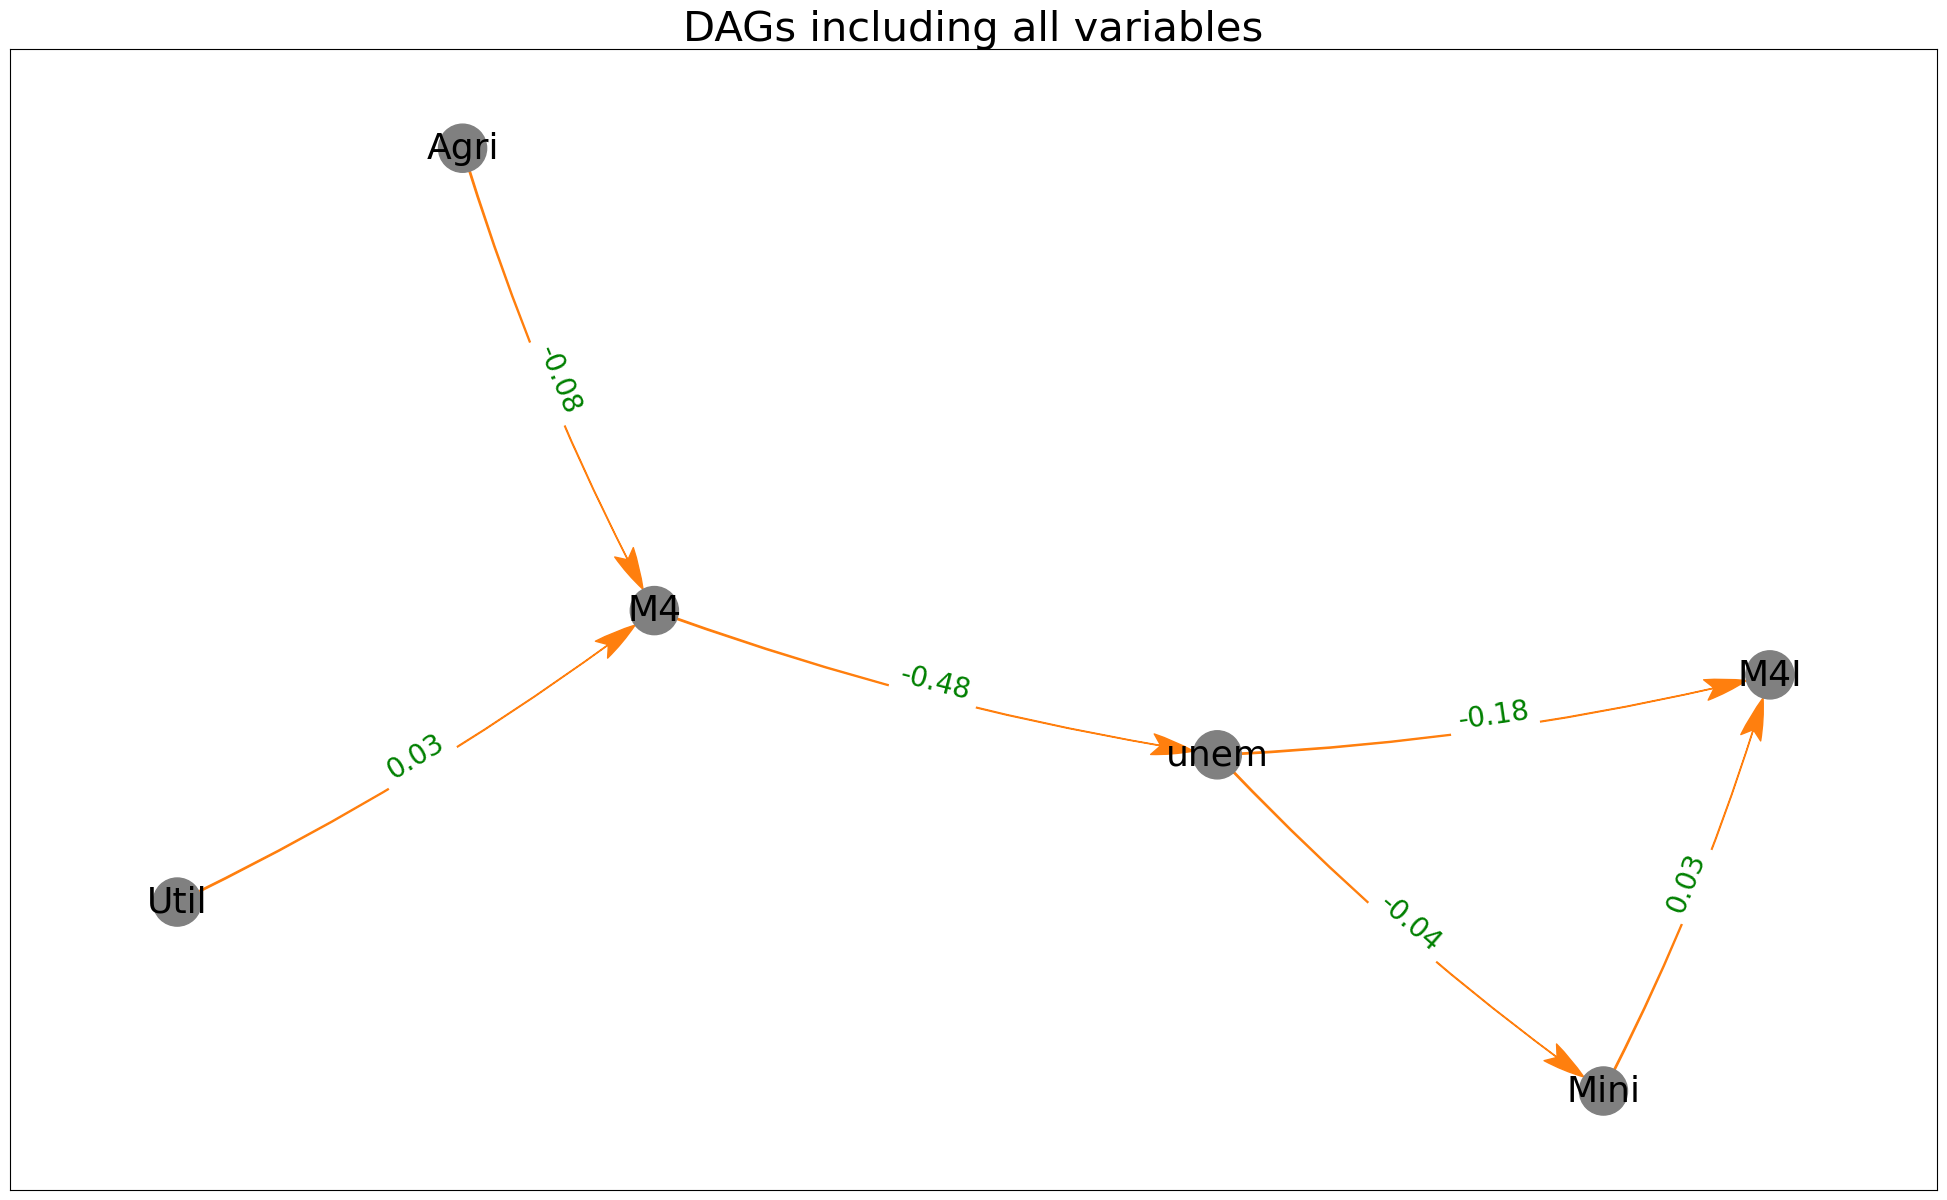

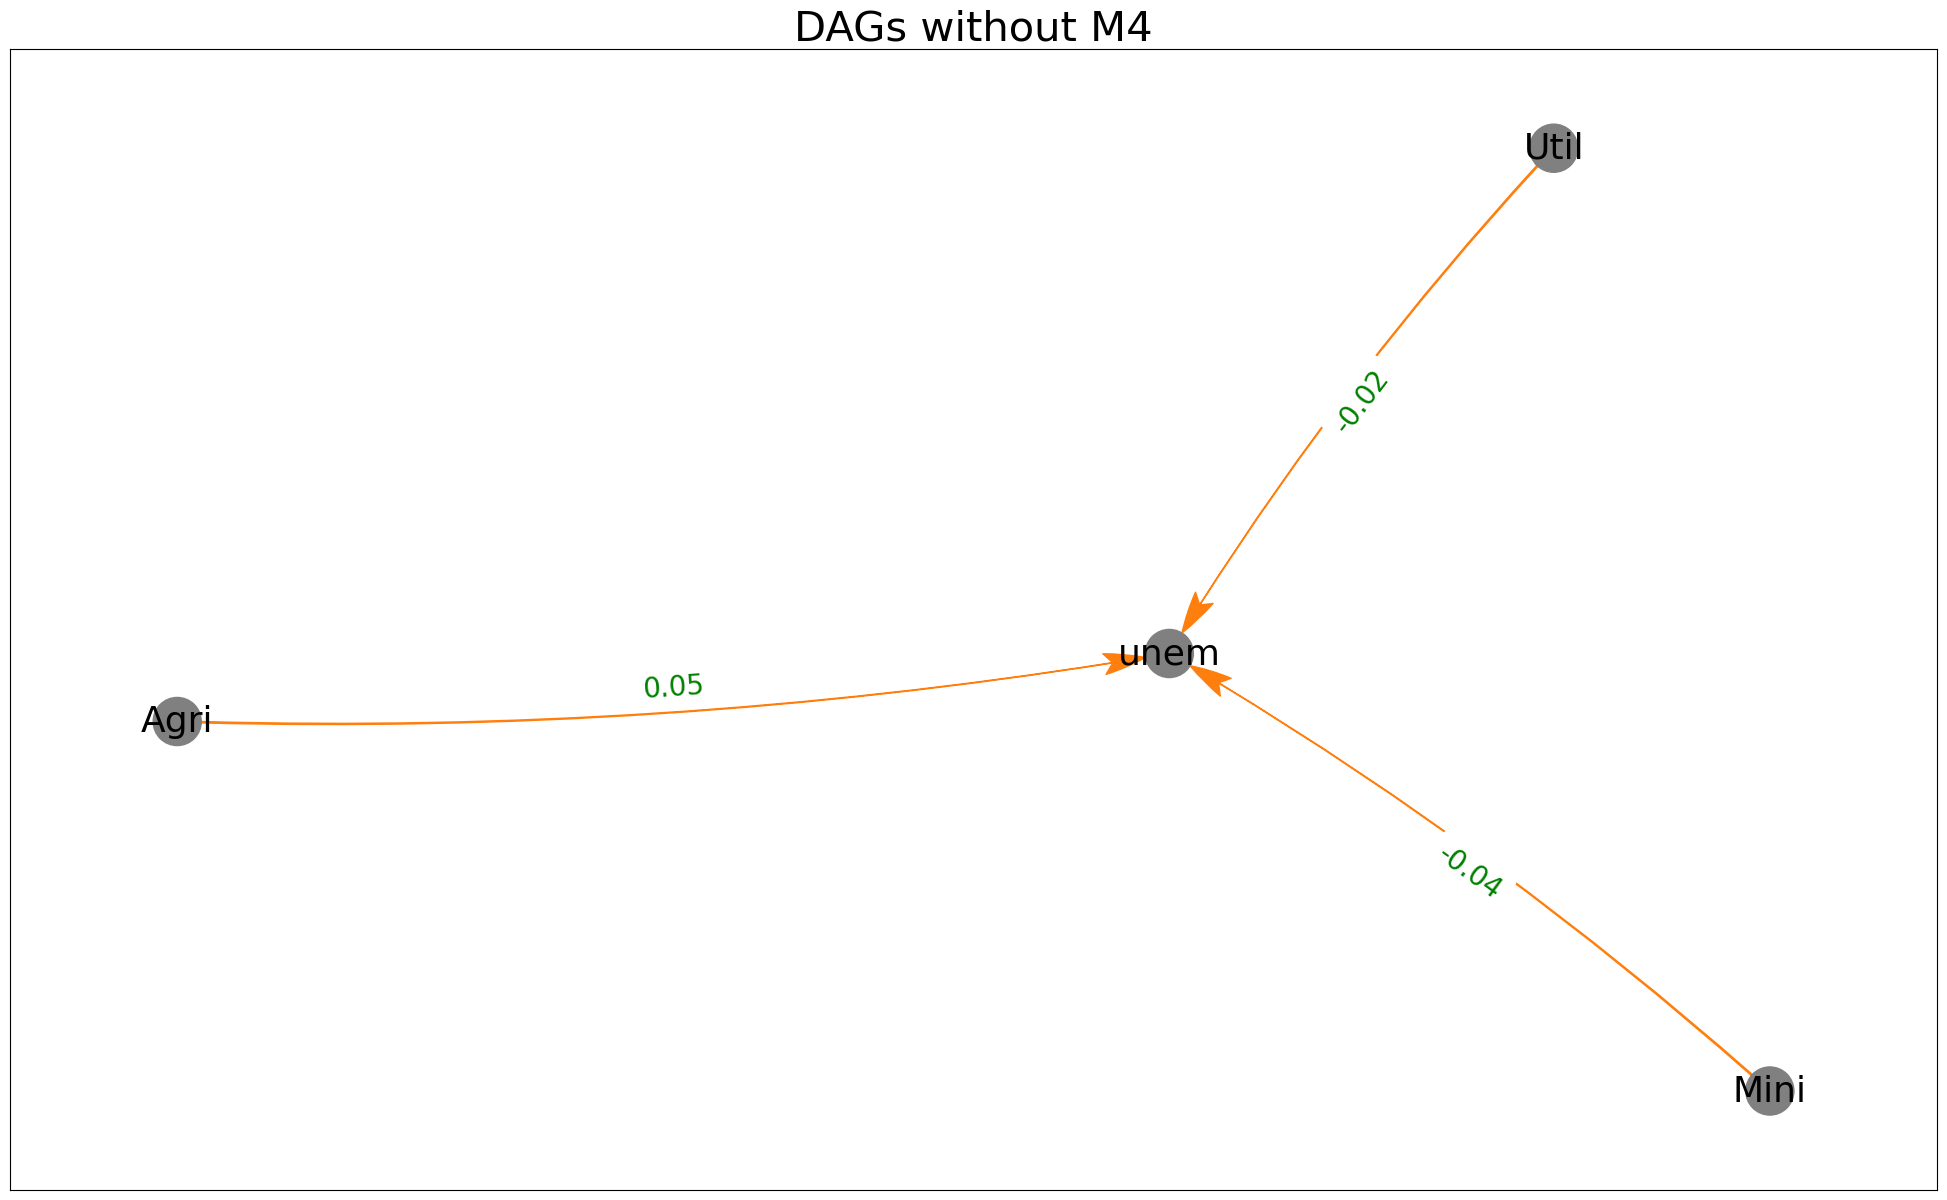

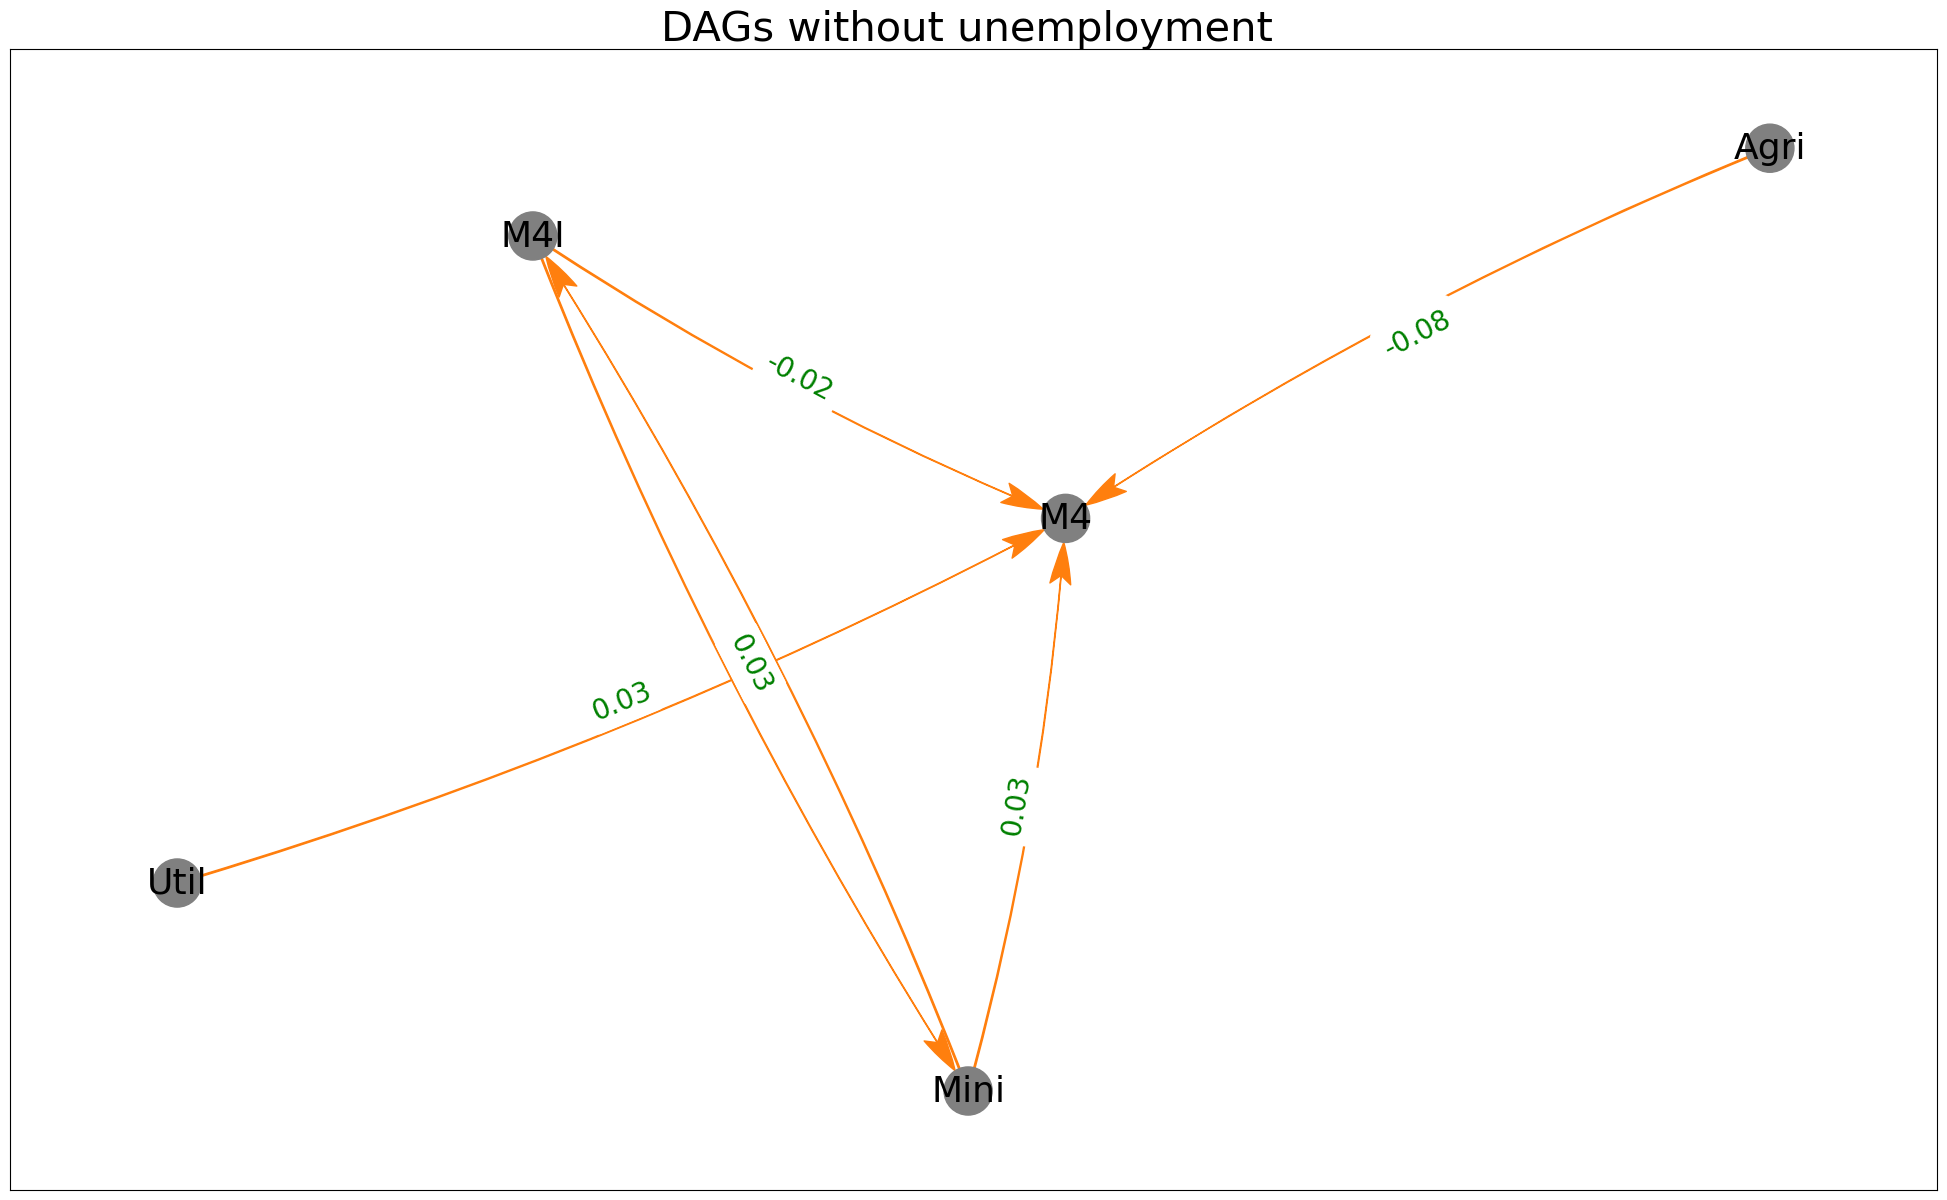

In [27]:
# Initialize a PdfPages object to save the plots in a PDF
pp = PdfPages("DAGs_nominal")

title = ['DAGs including all variables',
        'DAGs without M4',
        'DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, plot_df in enumerate([plot_df4, plot_df5, plot_df6]):
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])
    
    # Save the plot to the PDF
    pp.savefig()

# Close the PdfPages object
pp.close()


The above DAGs results indicate that the presence of the M4 variables act as an intermediary between the effectes of the production components (as can be seen in the first DAG), where M4 acts as an intermediary between the effects of utilities and agriculture. It also indicates the effect of unemployment rates acting as an intermediary as well between components, in this case, it acts as an intermediary between other components and mining.

However, when the M4 variables are excluded from the model, unemployment acts as the sole intermediary between the effects of components (the second DAG). Finally, when unmployment rates are not included in the model, but M4 included, the M4 variables act as the sole intermediary between components and their effects.

This indicates that there is about 100% consistency of the effect of the presence of M4 and Interest rates in the model. i.e, when M4 variables are included in a model, it is expected that they should act as an intermediary between effects of other sectors (or components). The same can also be said about the unemployment rates (but in the absensce of M4).

## Next we cluster the counties and create DAGs

In [28]:
# List of dataframes
dataframes = [ndr_13, ndr_14, ndr_16]

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]  # Updated to include p-values for each dataframe

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

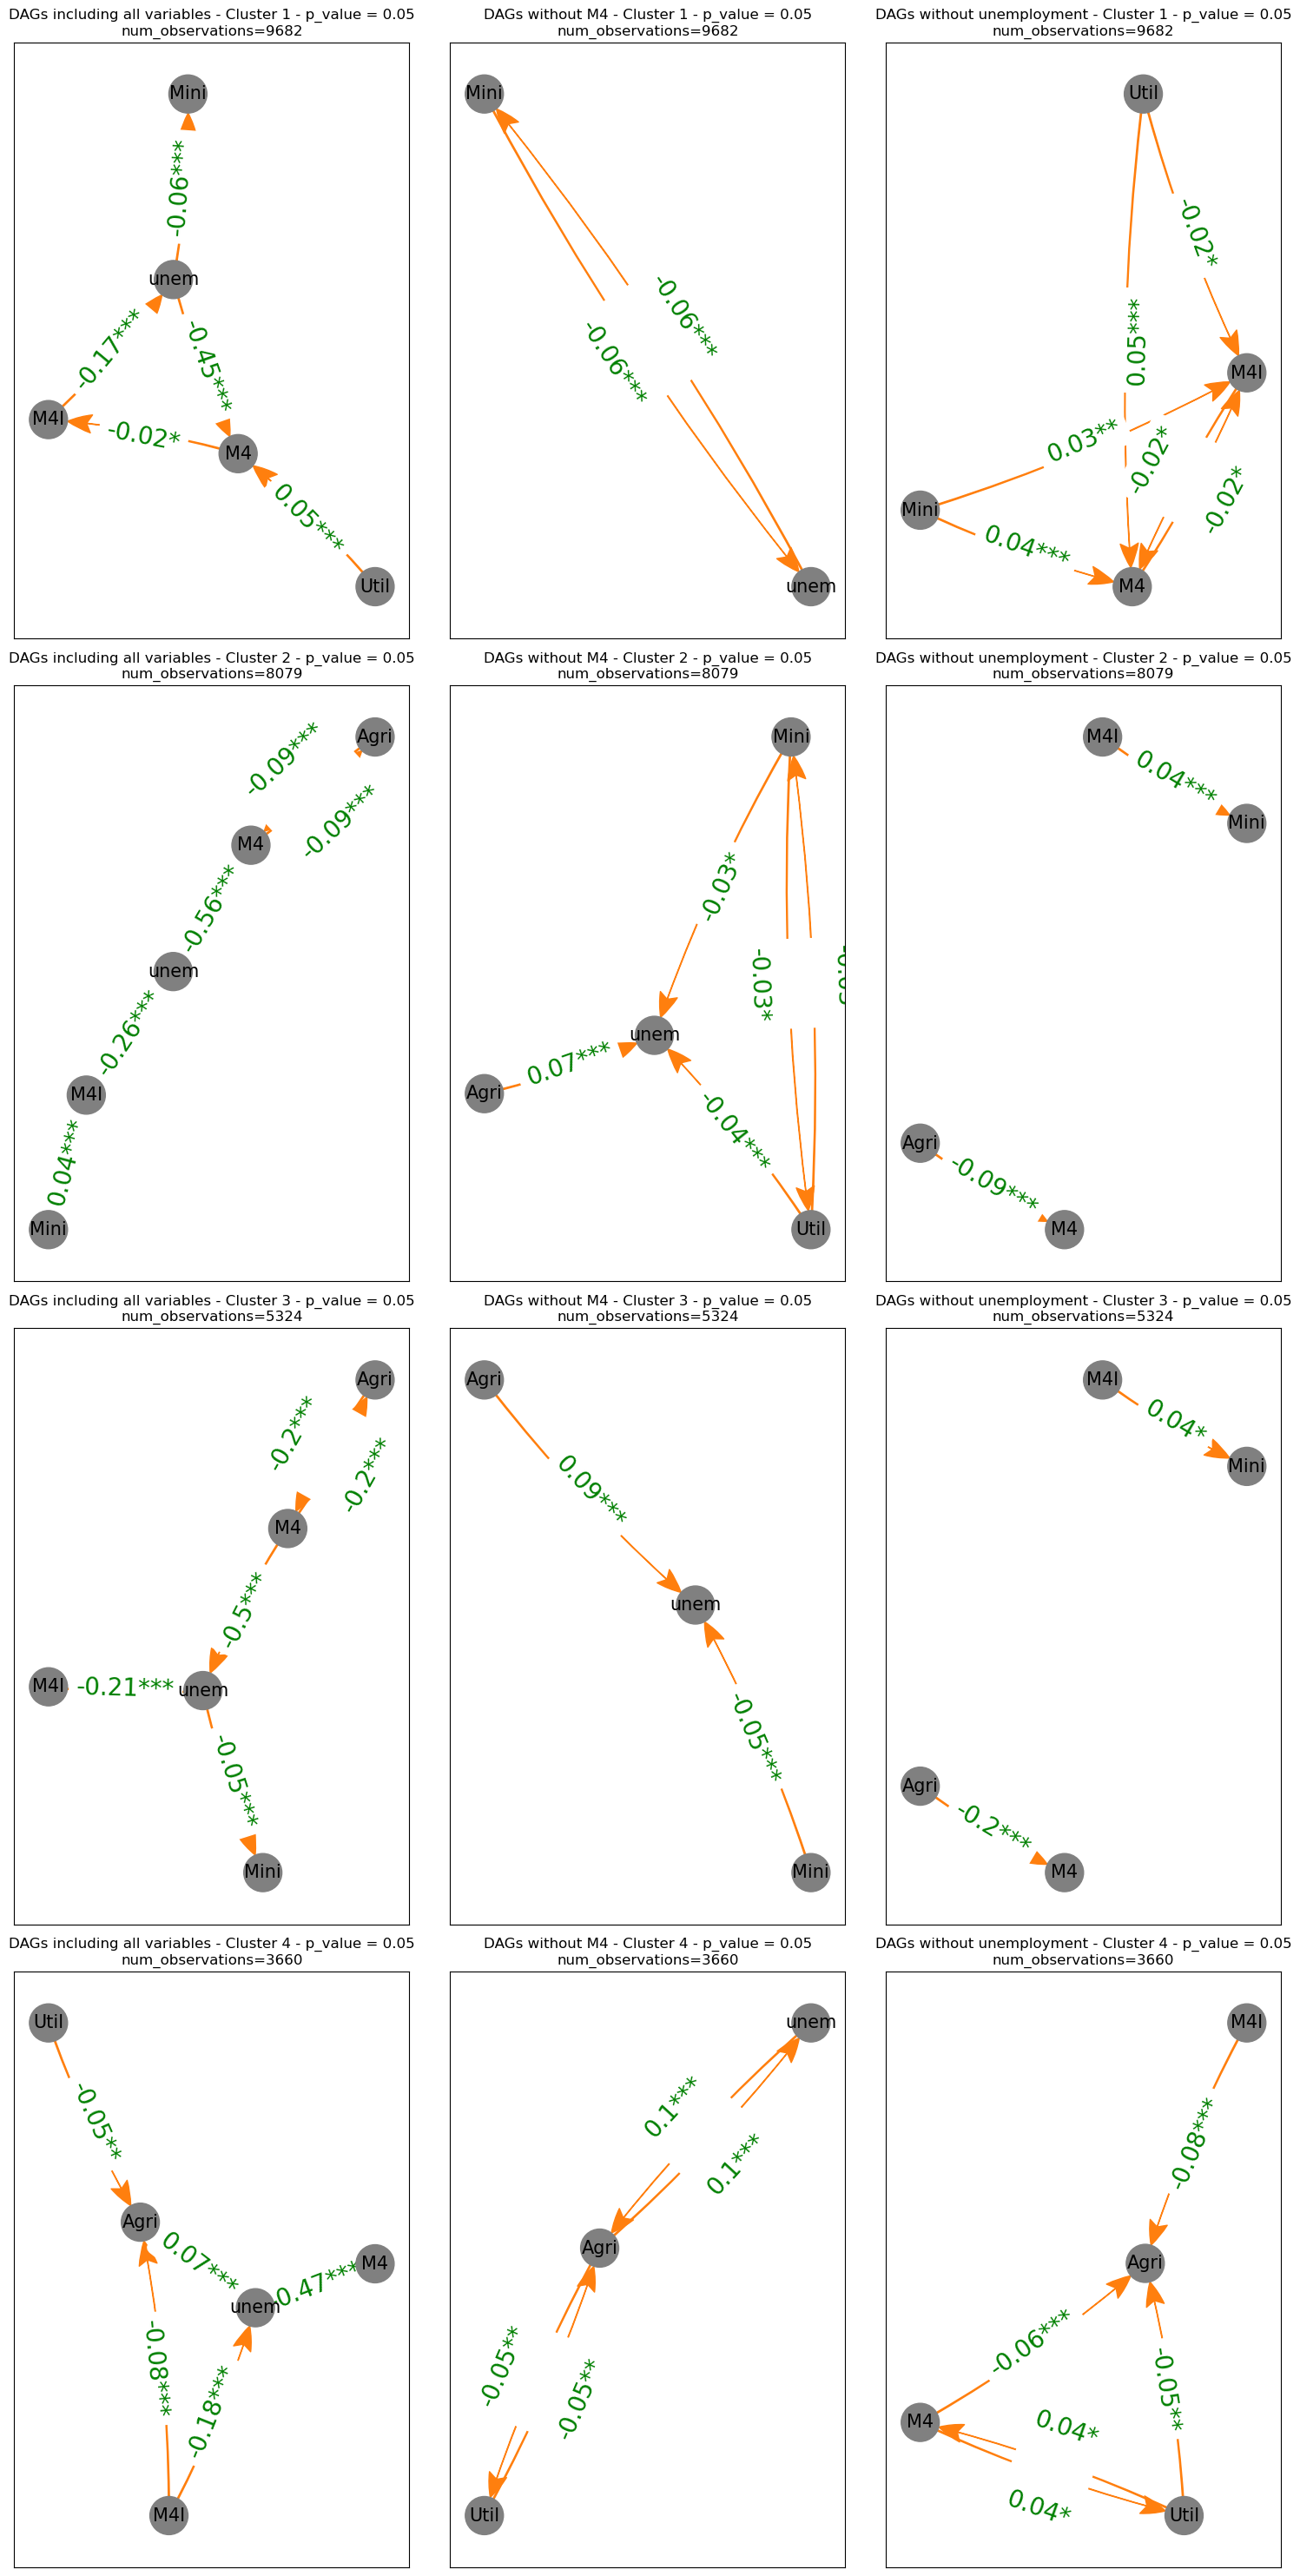

In [29]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Create a grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(5*len(dataframes), 30))

# Different PC algorithms to test
algorithms = ["orig"]

dataframe_names = {
    "Dataframe 1": "DAGs including all variables",
    "Dataframe 2": "DAGs without M4",
    "Dataframe 3": "DAGs without unemployment"
}

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            # Create DAG for the current cluster, p-value, and algorithm using the modified graph_DAG function
            graph_DAG_cluster(edges, cluster_df, title=f'{dataframe_names["Dataframe "+str(idx+1)]} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
pp.savefig(fig, bbox_inches='tight')

pp.close()
plt.show()

The above DAGs represent the results of clustering the counties and then generating DAGs from the clusters. The first column represent the DAGs created using all variables, the second column represent DAGs without M4 variables and the third column represent DAGs without unemployment rates.

We expect that the results should be consistent with the initial DAGs created (i.e, DAGs without clusters). The first column has a very similar set of results to the initial results. Where M4 intermediates the effects of other components. There is not a 100% consistency however.

For the second column (where the M4 variables are not included in the model), there is about 50% consistency of unemployment rates acting as an intermediary between the effects of other variables.

Finaly, the third column which represents DAGs for the model that does not include unemployment rates indicates about 25% consistency amongst the clusters.

The most consistent results according to the DAGs from the clusters compared with the original results appear to be the model where all variables are included.

In [30]:
edges_dct = get_edges_dict(dataframes)
col_shared_edges=get_col_shared_edges(edges_dct)
row_shared_edges=get_row_shared_edges(edges_dct)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
# def plot_shared_edges(shared_edges):
#     for key, lst in shared_edges.items():
#         fig, ax = plt.subplots(figsize=(6, 6))
#         G = nx.from_edgelist(lst)
#         color_map = ["grey" for _ in G]
#         plt.tight_layout()
#         pos = graphviz_layout(G)
#         nx.draw_networkx(G, pos, node_color=color_map, node_size=2500,
#                          font_color="black",
#                          font_size=26, alpha=1,
#                          width=1, edge_color="C1",
#                          connectionstyle='arc3, rad = 0.05',
#                          ax=ax)
#     plt.show()

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


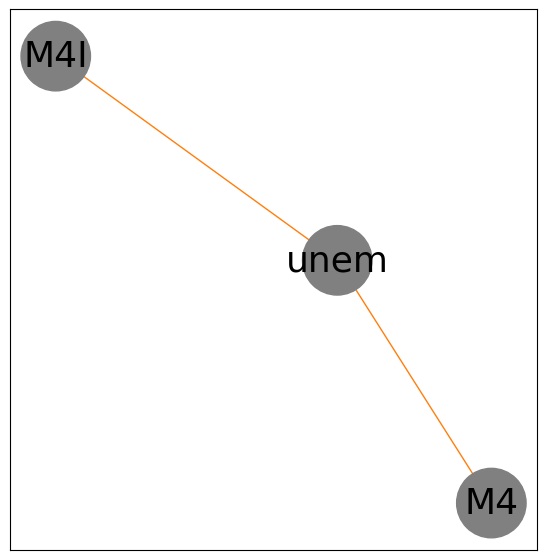

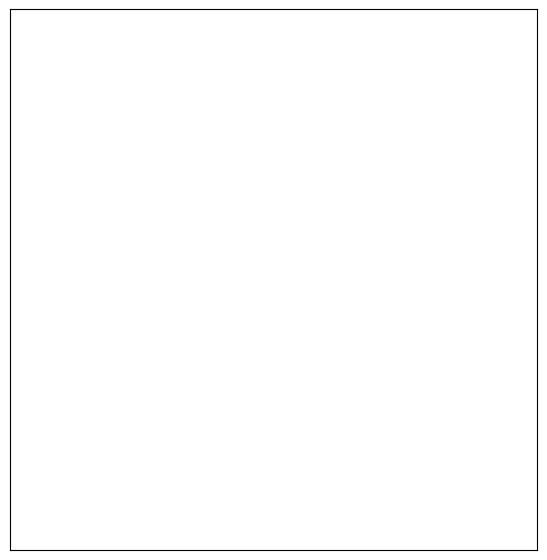

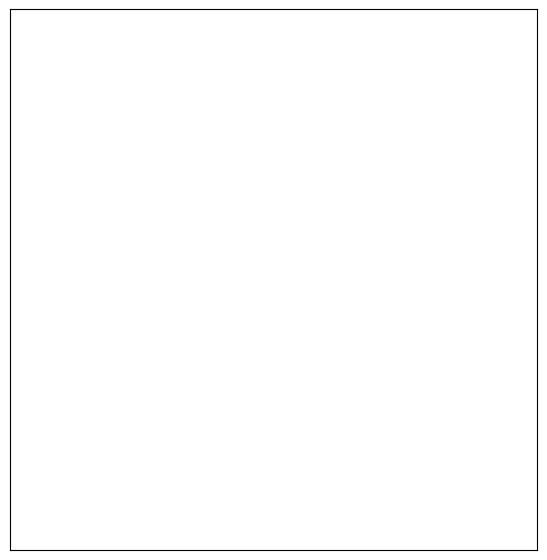

In [32]:
plot_shared_edges(col_shared_edges)

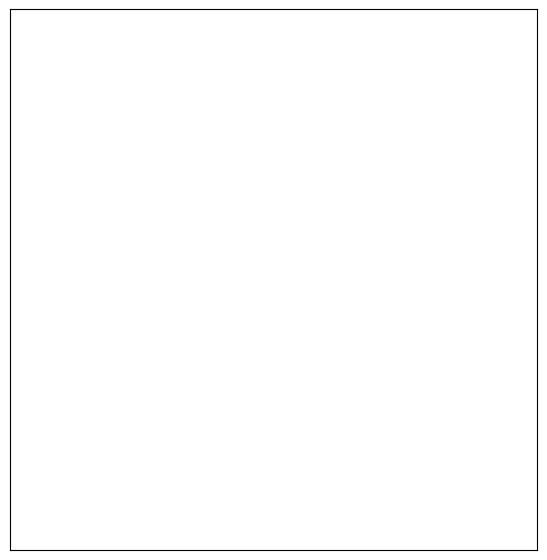

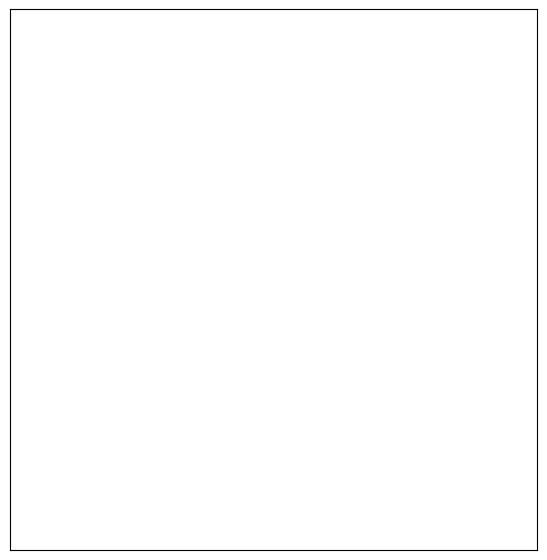

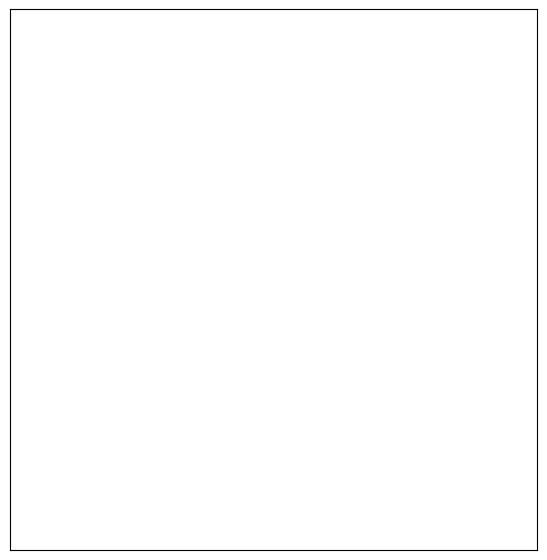

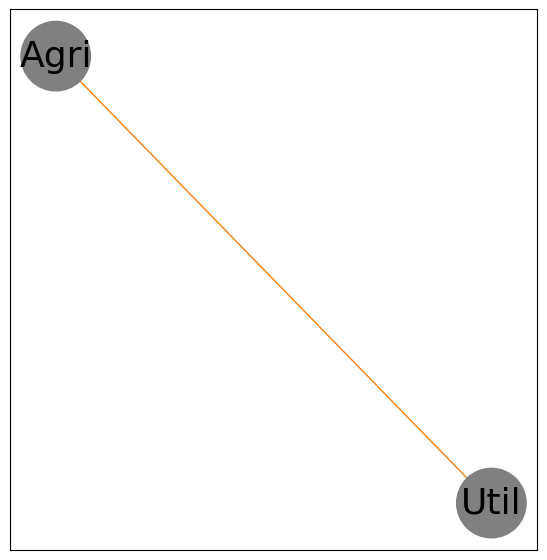

In [33]:
plot_shared_edges(row_shared_edges)

In [34]:
cluster_nominal_diff = ndr_13.reset_index()

In [35]:
full_nominal_diff = plot_df4.reset_index()

In [36]:
full_cluster_nominal_diff = pd.merge(full_nominal_diff, cluster_nominal_diff, on='FIPS_y', how='outer')

In [37]:
full_cluster_nominal_diff = full_cluster_nominal_diff.drop(columns=['Agri_x', 'Mini_x', 'Util_x', 'M4_x', 'M4I_x',
       'unem_x'])

In [38]:
full_cluster_nominal_diff=full_cluster_nominal_diff.rename(columns={'Agri_y':'Agri', 
                                          'Mini_y':'Mini', 
                                          'Util_y':'Util', 
                                          'M4_y':'M4', 
                                          'M4I_y':'M4I',
                                          'unem_y':'unem'})

In [39]:
full_cluster_nominal_diff=full_cluster_nominal_diff.set_index(['FIPS_y', 'TimePeriod'])

In [40]:
df_prelim = full_cluster_nominal_diff.copy()

In [41]:
df_prelim[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].describe()

,Agri,Mini,Util,M4,M4I,unem
count,380523.000000,380523.000000,380523.000000,380523.000000,380523.000000,380523.000000
mean,0.008115,-0.009857,-0.004517,0.002424,-0.000390,0.051999
std,1.198876,0.620573,0.515628,0.051701,0.006651,1.413580
min,-7.485003,-7.196588,-10.957942,-0.110658,-0.017333,-8.569231
25%,-0.531103,-0.230859,-0.143026,-0.006913,-0.001517,-0.700000
50%,-0.036171,-0.004177,-0.000289,0.007226,-0.000079,-0.253846
75%,0.479078,0.214184,0.127396,0.014530,0.001597,0.315385
max,8.803364,10.443862,9.861832,0.155660,0.011944,11.384615


In [42]:
df = df_prelim

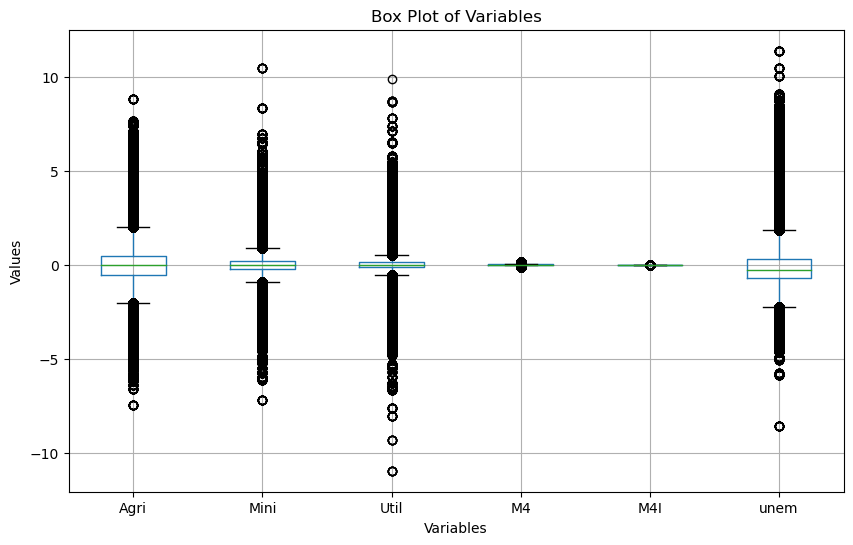

In [43]:
# Box plot of variables across different FIPS_y
plt.figure(figsize=(10, 6))
df[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].boxplot()
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

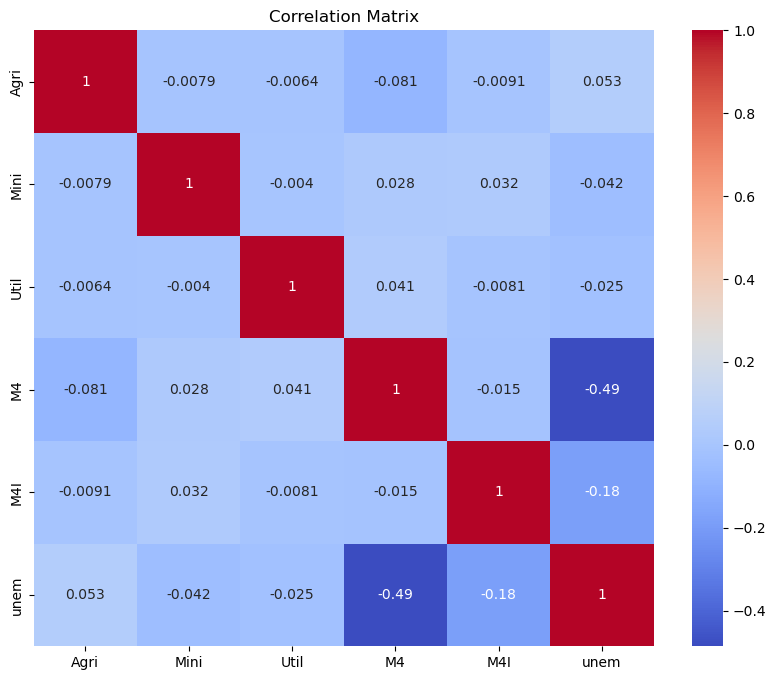

In [44]:
# Correlation matrix
correlation_matrix = df[['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']].corr()
#print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [45]:
# Group by 'clusters' and calculate the mean of each variable
mean_values_by_clusters = df.groupby('clusters').mean().reset_index()

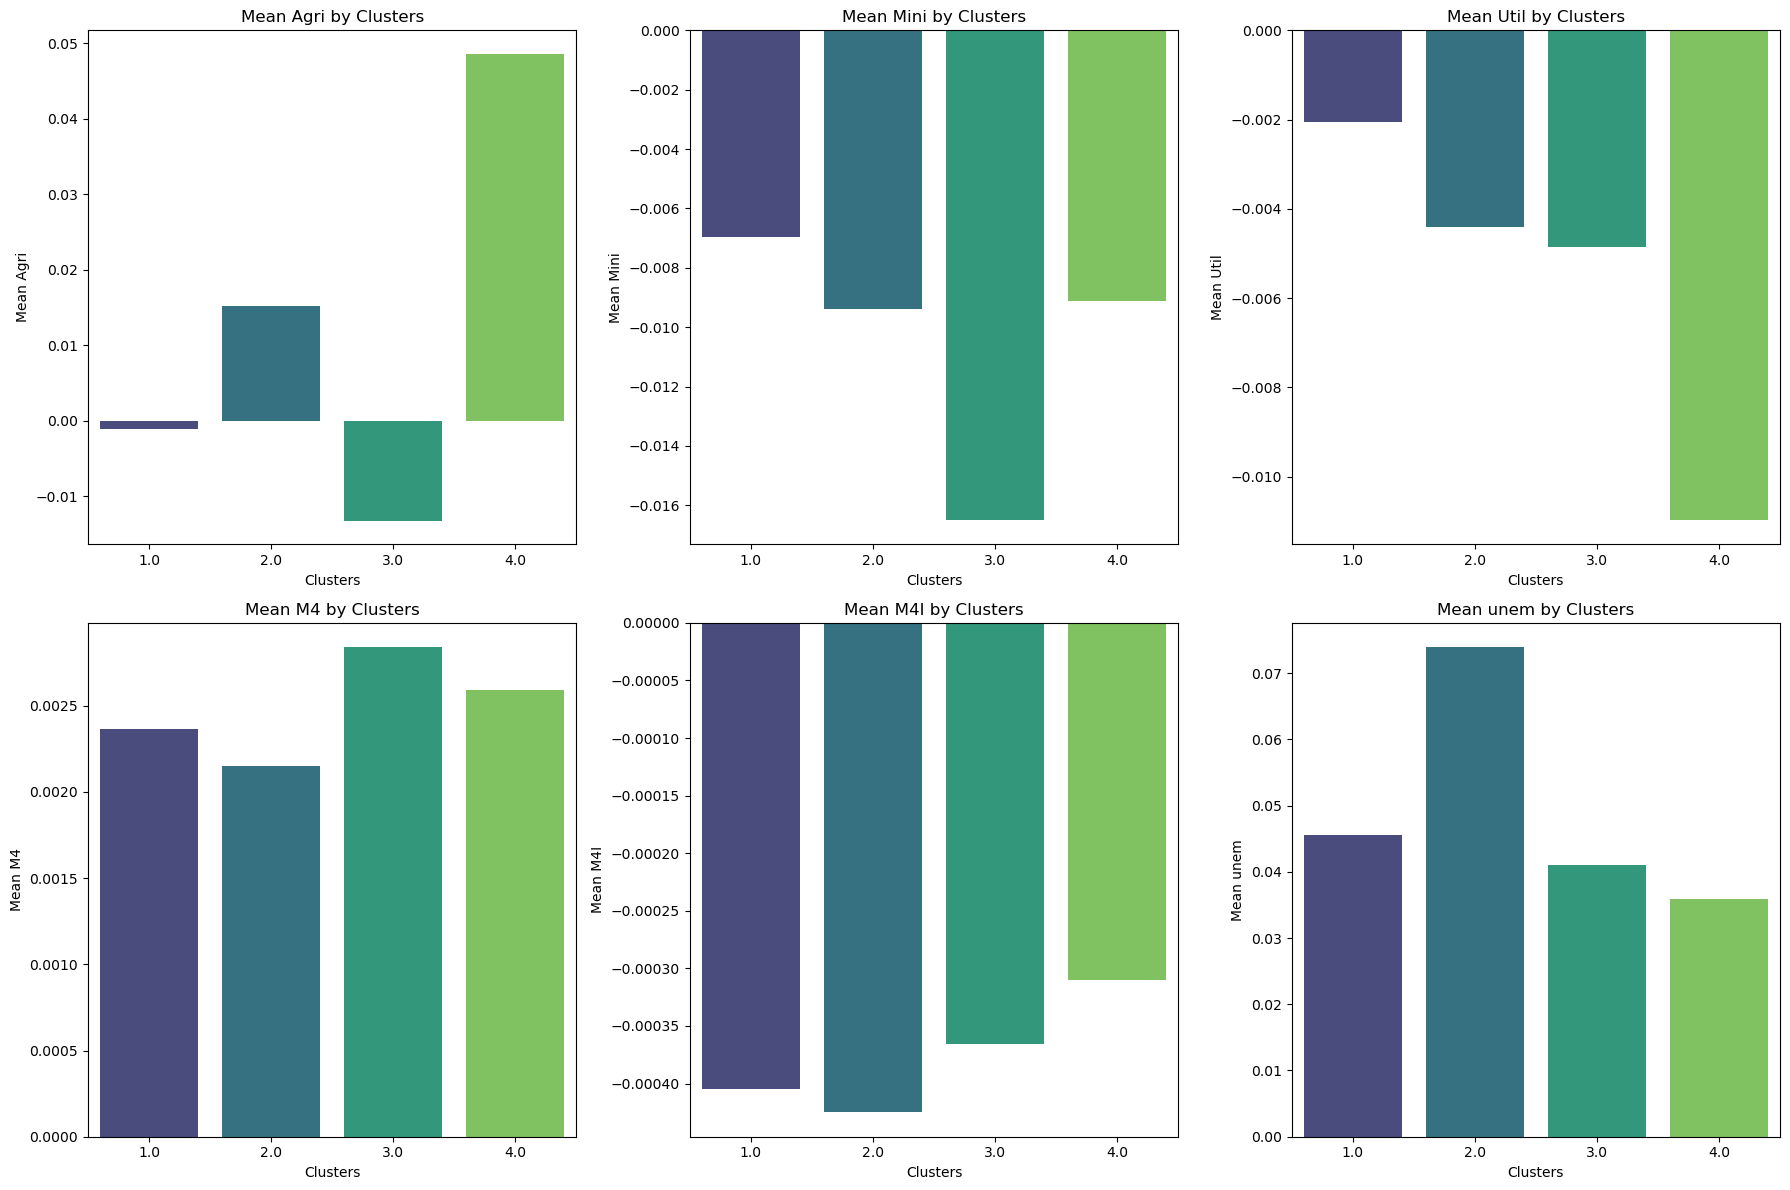

In [46]:
# List of variables to plot
variables = ['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(variables):
    sns.barplot(x='clusters', y=var, data=mean_values_by_clusters, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Mean {var} by Clusters')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel(f'Mean {var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [47]:
mean_values_by_clusters

,clusters,Agri,Mini,Util,M4,M4I,unem
0,1.0,-0.001156,-0.006950,-0.002045,0.002365,-0.000405,0.045563
1,2.0,0.015193,-0.009370,-0.004418,0.002153,-0.000425,0.073898
2,3.0,-0.013267,-0.016486,-0.004850,0.002839,-0.000366,0.040982
3,4.0,0.048645,-0.009127,-0.010969,0.002592,-0.000310,0.035963


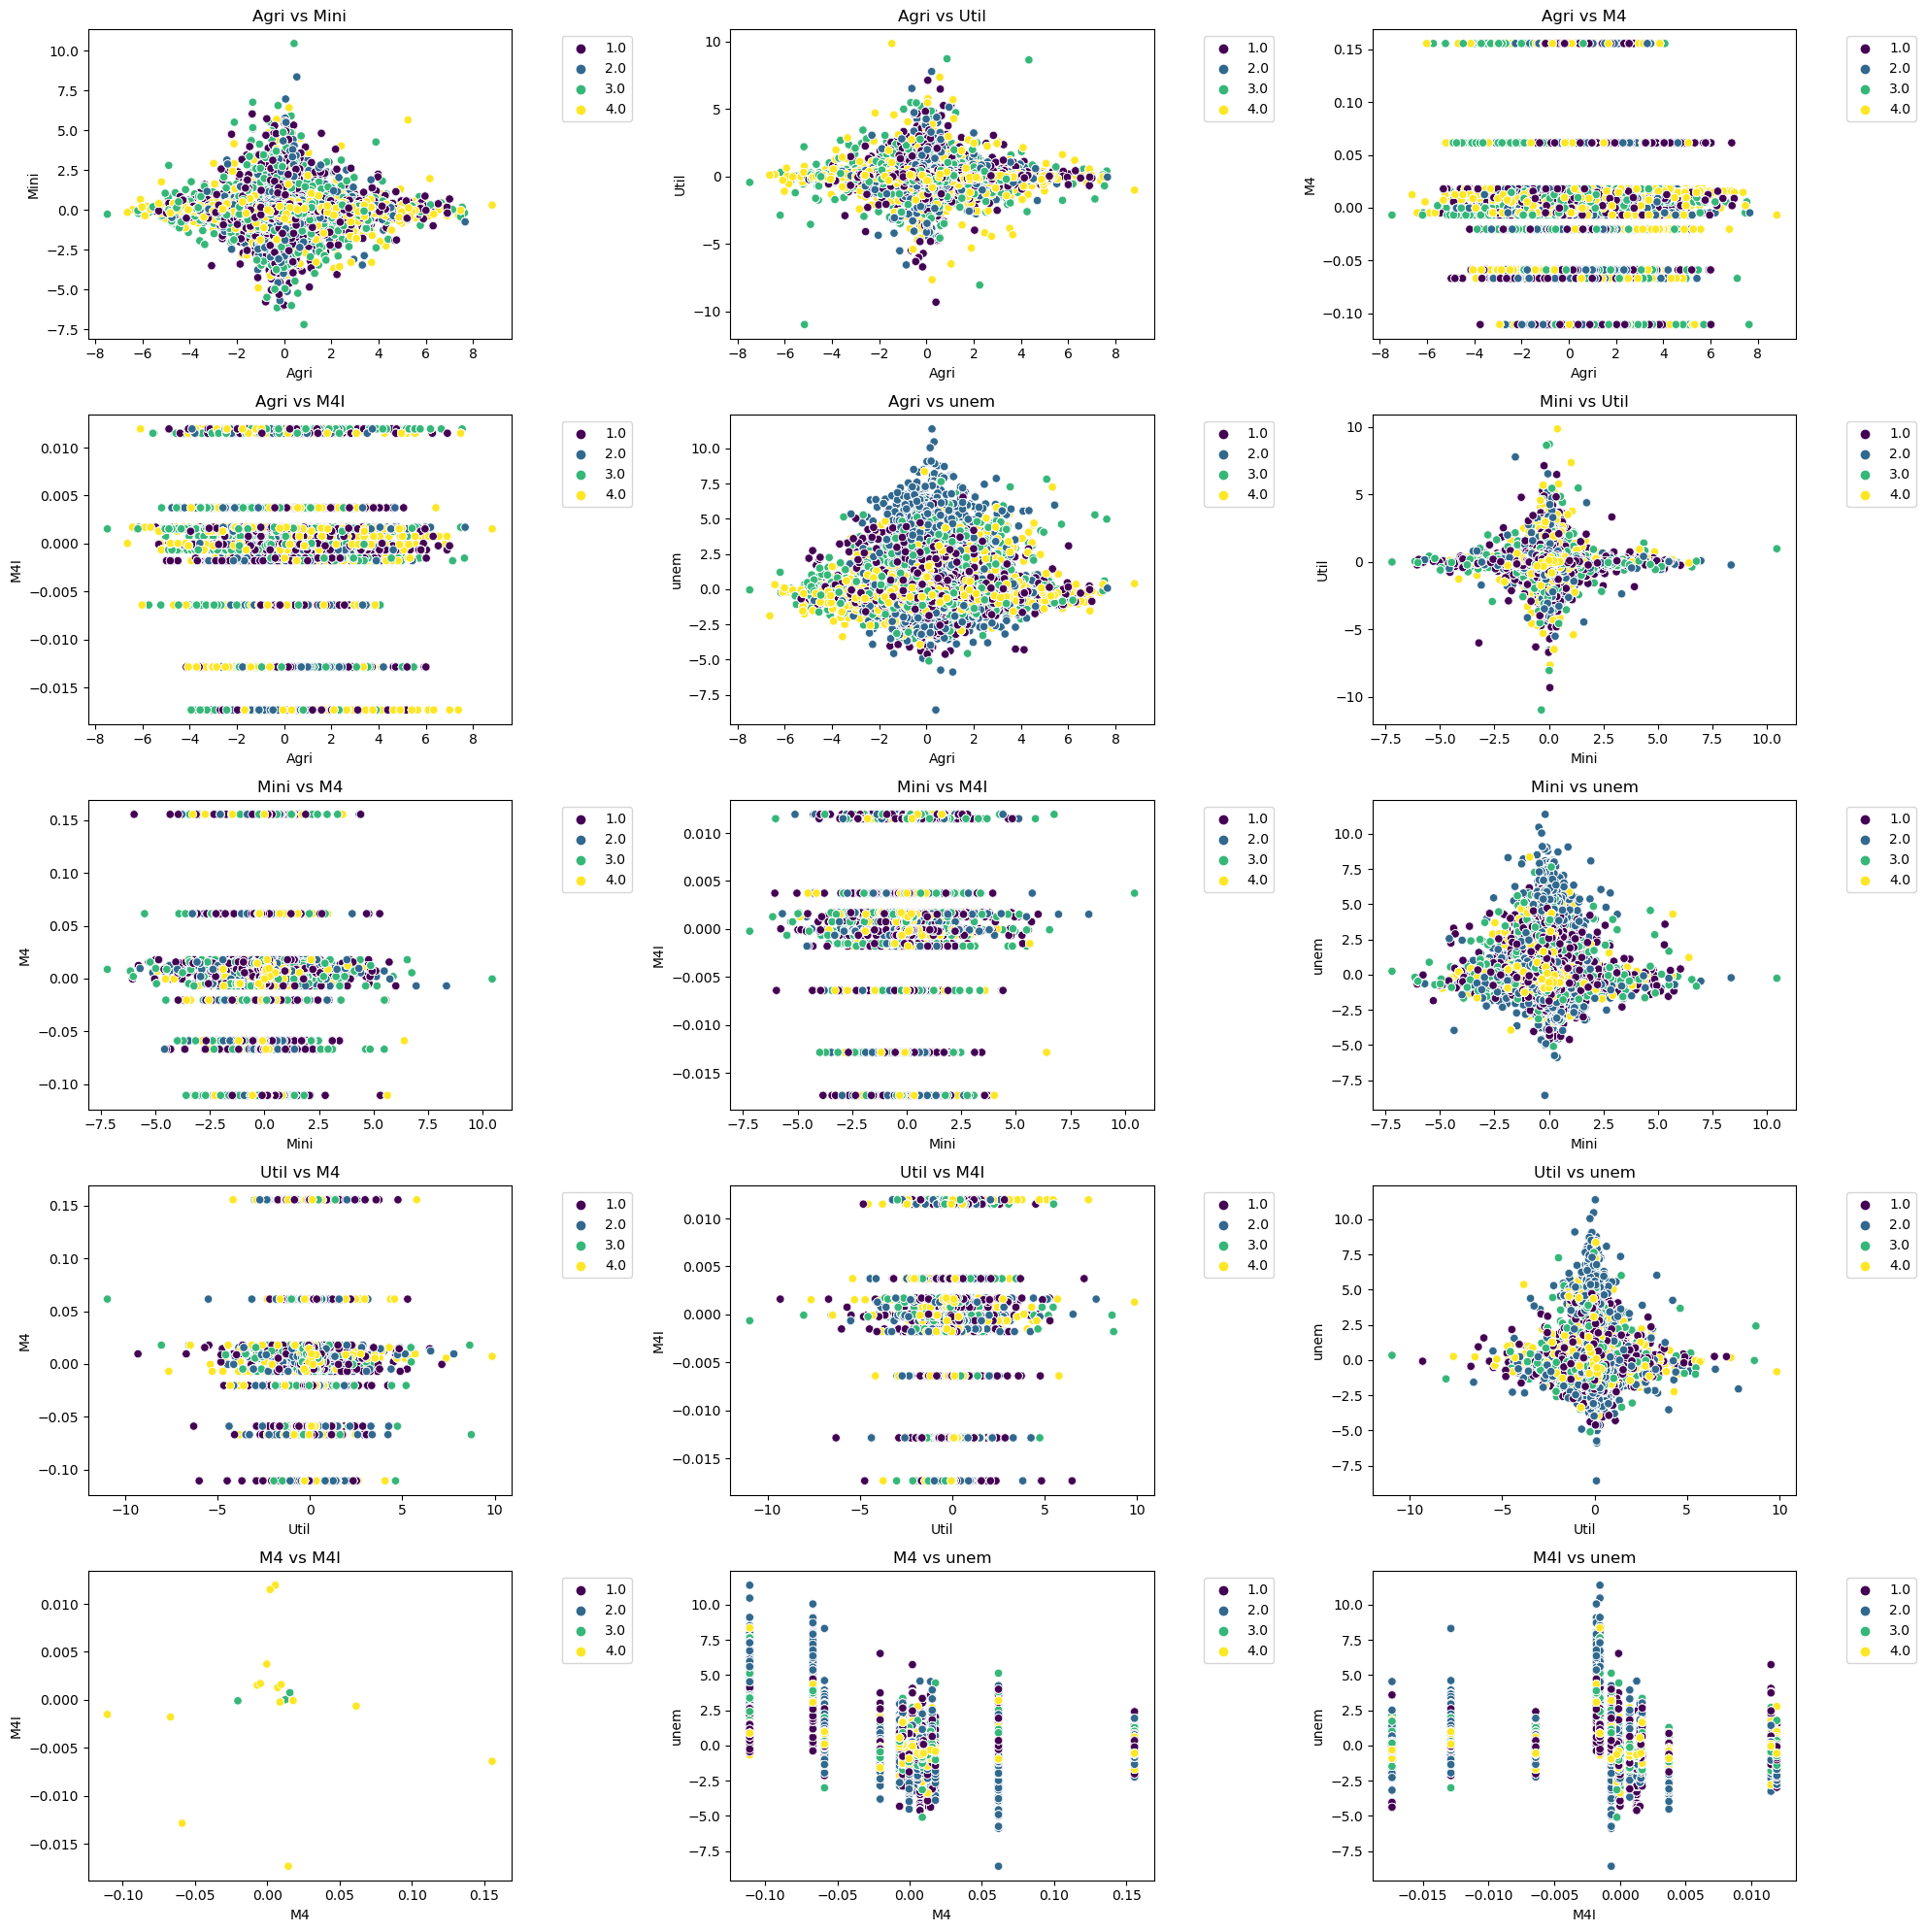

In [48]:
# Set up the plot grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()


# Generate scatter plots
plot_num = 0
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        if plot_num >= len(axes):
            break
        sns.scatterplot(x=variables[i], y=variables[j], hue='clusters', data=df.reset_index(), 
                        ax=axes[plot_num], palette='viridis', legend='full')
        axes[plot_num].set_title(f'{variables[i]} vs {variables[j]}')
        axes[plot_num].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        plot_num += 1

# Adjust layout
plt.tight_layout()
plt.show()

#### Mixed effects regression

In [49]:
df = full_cluster_nominal_diff.reset_index()
df = df.dropna()

# Fit a linear mixed effects model
m_me1 = smf.mixedlm("unem ~ Mini + Util + M4 + M4I + Agri", df, groups=df['clusters'])
r_me1 = m_me1.fit()

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [50]:
r_me1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:            MixedLM Dependent Variable: unem        
No. Observations: 380523  Method:             REML        
No. Groups:       4       Scale:              1.4519      
Min. group size:  51036   Log-Likelihood:     -610914.4174
Max. group size:  138718  Converged:          Yes         
Mean group size:  95130.8                                 
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.066    0.602    0.110 0.913  -1.115   1.247
Mini        -0.049    0.003  -15.672 0.000  -0.056  -0.043
Util        -0.017    0.004   -4.463 0.000  -0.024  -0.009
M4         -13.311    0.038 -350.672 0.000 -13.386 -13.237
M4I        -40.505    0.294 -137.816 0.000 -41.081 -39.929
Agri         0.014    0.002    8.316 0.000   0.010   0.017
Group Var    1.452                                        
==========================================================

"""

In [51]:
m_me2 = smf.mixedlm("unem ~ Mini + Util + M4 + M4I + Agri", df, groups=df['FIPS_y'])
r_me2 = m_me2.fit()

In [52]:
r_me2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:            MixedLM Dependent Variable: unem        
No. Observations: 380523  Method:             REML        
No. Groups:       2299    Scale:              1.4292      
Min. group size:  1       Log-Likelihood:     -609478.5670
Max. group size:  324     Converged:          Yes         
Mean group size:  165.5                                   
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.069    0.005   14.667 0.000   0.060   0.078
Mini        -0.049    0.003  -15.611 0.000  -0.055  -0.043
Util        -0.018    0.004   -4.789 0.000  -0.026  -0.011
M4         -13.295    0.038 -352.188 0.000 -13.369 -13.221
M4I        -40.180    0.293 -136.906 0.000 -40.755 -39.605
Agri         0.014    0.002    8.326 0.000   0.010   0.017
Group Var    0.034    0.001                               
==========================================================

"""

#### Fixed effects

In [53]:
df = df.set_index(['FIPS_y', 'TimePeriod'])

# Define the model formula
formula = 'unem ~ Mini + Util + M4 + M4I + Agri + EntityEffects'

# Fit the fixed effects model
m_fe = PanelOLS.from_formula(formula, df)
r_fe = m_fe.fit()

In [54]:
r_fe.summary

Dep. Variable:,unem,R-squared:,0.2743
Estimator:,PanelOLS,R-squared (Between):,0.2324
No. Observations:,380523,R-squared (Within):,0.2743
Date:,"Tue, May 21 2024",R-squared (Overall):,0.2720
Time:,14:28:02,Log-likelihood,-6.065e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2.859e+04
Entities:,2299,P-value,0.0000
Avg Obs:,165.52,Distribution:,"F(5,378219)"
Min Obs:,1.0000,,
Max Obs:,324.00,F-statistic (robust):,2.859e+04


#### Extracting the mixed effects and fixed effects results and tabulating them

In [65]:
# Extract results for the fixed effects model
fe_params = r_fe.params
fe_bse = r_fe.std_errors
fe_tvalues = r_fe.tstats
fe_pvalues = r_fe.pvalues

# Create a summary DataFrame for the fixed effects model
fe_summary = pd.DataFrame({
    'Coef.': fe_params,
    'Std.Err.': fe_bse,
    #'t': fe_tvalues,
    'P>|t|': fe_pvalues
})

# Extract results for the mixed effects model with group=clusters
me_params = r_me1.params
me_bse = r_me1.bse
me_tvalues = r_me1.tvalues
me_pvalues = r_me1.pvalues

# Create a summary DataFrame for the mixed effects model
me_summary = pd.DataFrame({
    'Coef.': me_params,
    'Std.Err.': me_bse,
    #'t': me_tvalues,
    'P>|t|': me_pvalues
})

# Extract results for the mixed effects model with group=fipcodes
me2_params = r_me2.params
me2_bse = r_me2.bse
me2_tvalues = r_me2.tvalues
me2_pvalues = r_me2.pvalues

# Create a summary DataFrame for the model
me2_summary = pd.DataFrame({
    'Coef.': me2_params,
    'Std.Err.': me2_bse,
    #'t': me2_tvalues,
    'P>|t|': me2_pvalues
})

fe_summary=fe_summary.round(4)
me_summary=me_summary.round(4)
me2_summary=me2_summary.round(4)

# Combine the summaries into a single DataFrame for comparison
comparison_summary = pd.concat([fe_summary, me_summary, me2_summary], 
                               keys=['Fixed Effects',
                                     'Mixed Effects(group=clusters)',
                                     'Mixed Effects(group=fipcodes)'], axis=1)
comparison_summary


Fixed Effects                Mixed Effects(group=clusters)           \
                  Coef. Std.Err. P>|t|                         Coef. Std.Err.   
Mini            -0.0484   0.0031   0.0                       -0.0494   0.0032   
Util            -0.0178   0.0038   0.0                       -0.0169   0.0038   
M4             -13.2872   0.0378   0.0                      -13.3112   0.0380   
M4I            -40.0158   0.2946   0.0                      -40.5046   0.2939   
Agri             0.0135   0.0016   0.0                        0.0136   0.0016   
Intercept           NaN      NaN   NaN                        0.0662   0.6025   
Group Var           NaN      NaN   NaN                        1.0000      NaN   

                  Mixed Effects(group=fipcodes)                 
            P>|t|                         Coef. Std.Err. P>|t|  
Mini       0.0000                       -0.0490   0.0031   0.0  
Util       0.0000                       -0.0181   0.0038   0.0  
M4         0.0000                      -13.2952   0.0378   0.0  
M4I        0.0000                      -40.1802   0.2935   0.0  
Agri       0.0000                        0.0135   0.0016   0.0  
Intercept  0.9125                        0.0689   0.0047   0.0  
Group Var     NaN                        0.0237   0.0012   0.0

In [61]:
hausman_test(r_fe, r_me1, r_me2).round(3)

/Users/abiodun.idowu/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/Desktop/PhD/BEA project/notebook_to_start/AbiodunsProject/Summer project update/abbeyFunctions.py:348: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b_diff_me1 = b_fe[common_coef].sub(b_me1[common_coef])
/Users/abiodun.idowu/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/Desktop/PhD/BEA project/notebook_to_start/AbiodunsProject/Summer project update/abbeyFunctions.py:348: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  b_diff_me1 = b_fe[common_coef].sub(b_me1[common_coef])
/Users/abiodun.idowu/Library/CloudStorage/OneDrive-NorthDakotaUniversitySystem/Desktop/PhD/BEA project/notebook_to_start/AbiodunsProject/Summer project update/abbeyFunctions.py:349: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
 

,Hausman_ME1,Hausman_ME2
t,559.05,63.495
p,0.00,0.000


#### Panel VAR

In [63]:
# Initialize lists to store the results
lag_orders = []
aic_values = []
bic_values = []

# Loop over a range of lag orders
for i in range(1, 11):
    m1 = VAR(df)
    results = m1.fit(i)
    lag_orders.append(i)
    aic_values.append(results.aic)
    bic_values.append(results.bic)

# Create a DataFrame to store the results
comparison_df = pd.DataFrame({
    'Lag Order': lag_orders,
    'AIC': aic_values,
    'BIC': bic_values
})

# Display the comparison DataFrame
comparison_df

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

,Lag Order,AIC,BIC
0,1,-23.515563,-23.513966
1,2,-24.313187,-24.310193
2,3,-24.577327,-24.572937
3,4,-24.717154,-24.711366
4,5,-24.959551,-24.952366
5,6,-25.028319,-25.019737
6,7,-25.089859,-25.079880
7,8,-25.129260,-25.117883
8,9,-25.244497,-25.231724
9,10,-25.318199,-25.304028


In [56]:
r_var1 = m1.fit(2)

r_var1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, May, 2024
Time:                     14:28:09
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -24.3102
Nobs:                     380521.    HQIC:                  -24.3123
Log likelihood:           846393.    FPE:                2.76005e-11
AIC:                     -24.3132    Det(Omega_mle):     2.75929e-11
--------------------------------------------------------------------
Results for equation Agri
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.033267         0.003447           -9.651           0.000
L1.Agri            -0.728489         0.001552         -469.245           0.000
L1.Mini             0.033442         0.002696           12.405       

In [57]:
# Initialize a dictionary to store the results
results_dict = {}

# Loop over a range of lag orders
for i in range(1, 11):
    m1 = VAR(df)
    r_var = m1.fit(i)
    results_dict[f'Lag {i}'] = r_var


/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

In [58]:
# Function to extract coefficients, standard errors, t-values, and p-values
def extract_results(results, lag):
    summary_dict = {}
    for variable in results.params.columns:
        for dependent in results.params.index:
            key = f'{dependent} ~ {variable} (Lag {lag})'
            summary_dict[key] = {
                'Coef.': results.params.loc[dependent, variable],
                'Std.Err.': results.bse.loc[dependent, variable],
                't': results.tvalues.loc[dependent, variable],
                'P>|t|': results.pvalues.loc[dependent, variable]
            }
    return summary_dict

# Initialize a list to store all the results
all_results = []

# Loop over the results dictionary to extract and combine the results
for lag, res in results_dict.items():
    all_results.append(pd.DataFrame(extract_results(res, lag)).T)

# Combine all results into a DataFrame
comparison_df = pd.concat(all_results)

comparison_df = comparison_df.round(4)

comparison_df


,Coef.,Std.Err.,t,P>|t|
const ~ Agri (Lag Lag 1),-0.0221,0.0036,-6.1272,0.0000
L1.Agri ~ Agri (Lag Lag 1),-0.5654,0.0013,-422.3617,0.0000
L1.Mini ~ Agri (Lag Lag 1),0.0301,0.0026,11.6633,0.0000
L1.Util ~ Agri (Lag Lag 1),-0.0168,0.0031,-5.4011,0.0000
L1.M4 ~ Agri (Lag Lag 1),0.0018,0.0357,0.0501,0.9600
...,...,...,...,...
L10.Util ~ clusters (Lag Lag 10),-0.0002,0.0004,-0.4579,0.6470
L10.M4 ~ clusters (Lag Lag 10),0.0076,0.0052,1.4396,0.1500
L10.M4I ~ clusters (Lag Lag 10),0.0163,0.0531,0.3064,0.7593
L10.unem ~ clusters (Lag Lag 10),-0.0000,0.0002,-0.2072,0.8358
